**###DATA ANALYSIS Section###**

In [1]:
###Importing libraries###
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(
accuracy_score,
precision_score,
recall_score,
f1_score,
roc_auc_score,
matthews_corrcoef,
cohen_kappa_score)


In [2]:
train_df = pd.read_csv(r"C:\Users\hp\Desktop\mayie\University of Johannesburg\Data Analysis\cell2celltrain.csv")
train_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
print(train_df['Churn'].value_counts())


Churn
No     36336
Yes    14711
Name: count, dtype: int64


***DATA PREPROCESSING***

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
missing_values = train_df.isnull().sum()
print(missing_values)

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [6]:
# Separating numeric and categorical columns automatically
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

# Imputing numeric columns with median
num_imputer = SimpleImputer(strategy='median')
train_df[numeric_cols] = num_imputer.fit_transform(train_df[numeric_cols])

# Imputing categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])

# Verify missing values are handled
print(train_df.isnull().sum())

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [7]:
duplicates = train_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


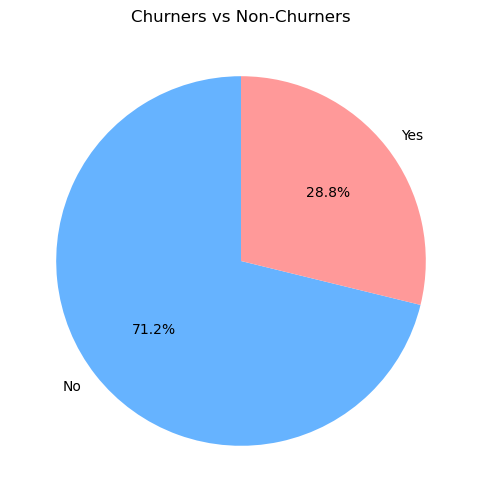

In [8]:
# Counting churners and non-churners
churn_counts = train_df['Churn'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Churners vs Non-Churners')
plt.show()

In [9]:
print(train_df['Churn'].value_counts())


Churn
No     36336
Yes    14711
Name: count, dtype: int64


In [10]:
benefit_vars = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
                'MonthsInService', 'ActiveSubs', 'Handsets', 'HandsetModels', 
                'HandsetWebCapable', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 
                'BuysViaMailOrder', 'RespondsToMailOffers', 'RetentionOffersAccepted', 
                'ReferralsMadeBySubscriber']


In [11]:
cost_vars = ['DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 
             'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 
             'CustomerCareCalls', 'CallForwardingCalls', 'CallWaitingCalls', 
             'AdjustmentsToCreditRating']


In [12]:
moderator_vars = ['AgeHH1', 'AgeHH2', 'MaritalStatus', 'Occupation', 
                  'IncomeGroup', 'PrizmCode', 'ServiceArea', 'CreditRating', 
                  'ChildrenInHH', 'HasCreditCard', 'TruckOwner', 'RVOwner', 
                  'Homeownership', 'NotNewCellphoneUser']


In [13]:
# Converting Yes/No to 1/0
train_df['Churn'] = train_df['Churn'].map({'No': 0, 'Yes': 1})

# Check unique values and counts
print(train_df['Churn'].unique())
print(train_df['Churn'].value_counts())


[1 0]
Churn
0    36336
1    14711
Name: count, dtype: int64


In [14]:
# Cross-checking of  numeric values
train_df[benefit_vars] = train_df[benefit_vars].apply(pd.to_numeric, errors='coerce').fillna(0)
train_df[cost_vars] = train_df[cost_vars].apply(pd.to_numeric, errors='coerce').fillna(0)

# Defining benefits and costs
train_df['Perceived_Benefits'] = train_df[benefit_vars].sum(axis=1)
train_df['Perceived_Costs'] = train_df[cost_vars].sum(axis=1)

# Satisfaction Score = Benefits - Costs
train_df['SatisfactionScore'] = train_df['Perceived_Benefits'] - train_df['Perceived_Costs']


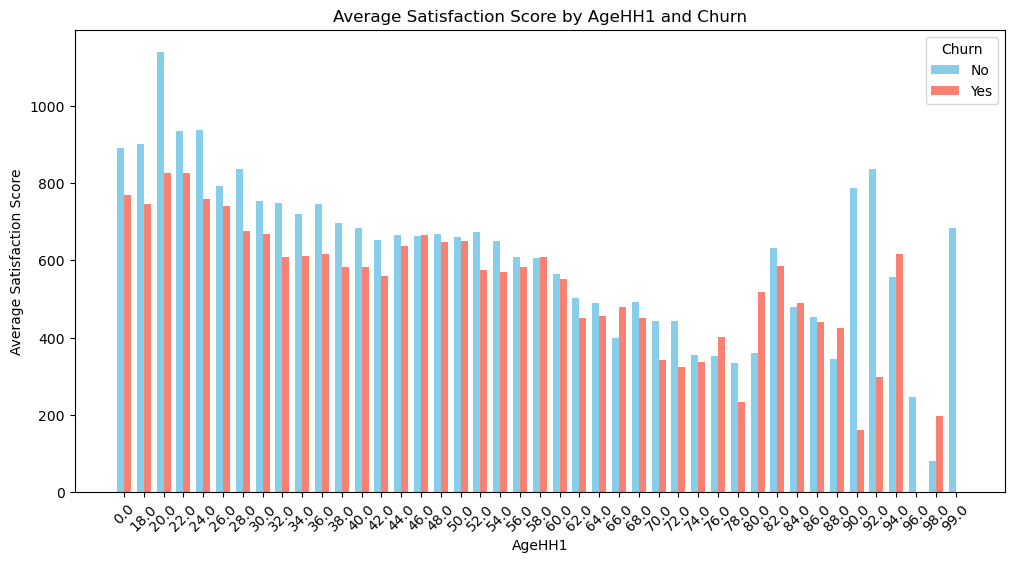

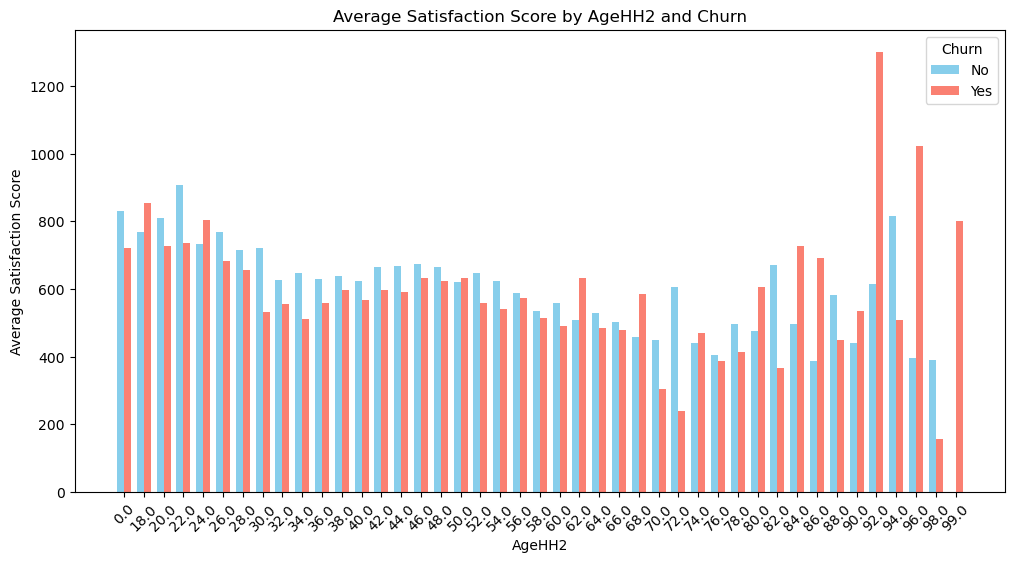

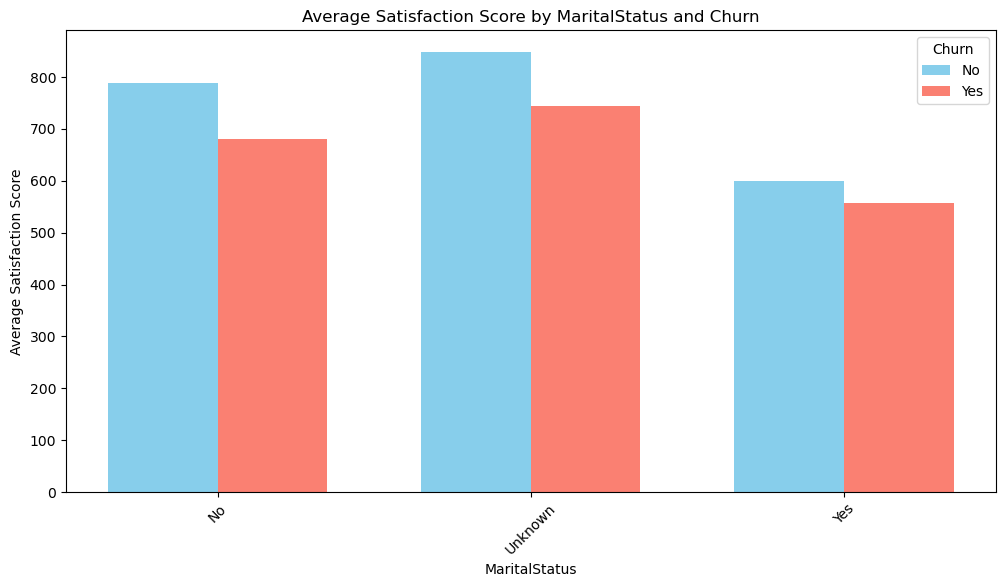

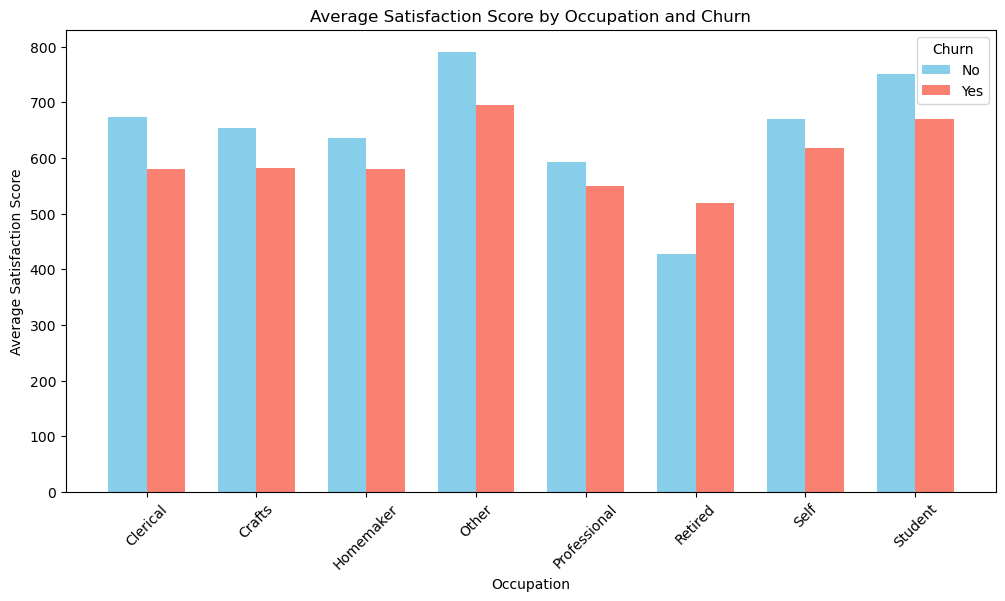

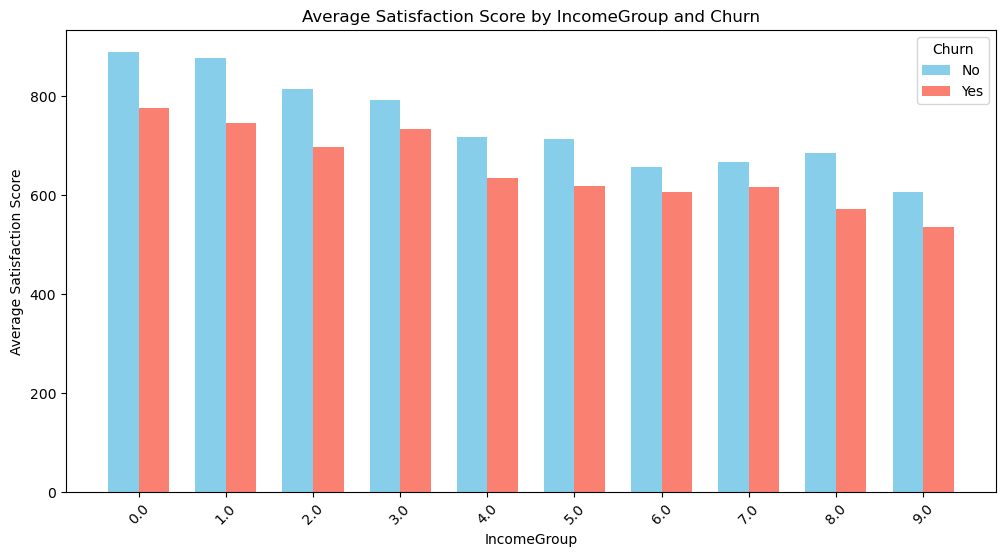

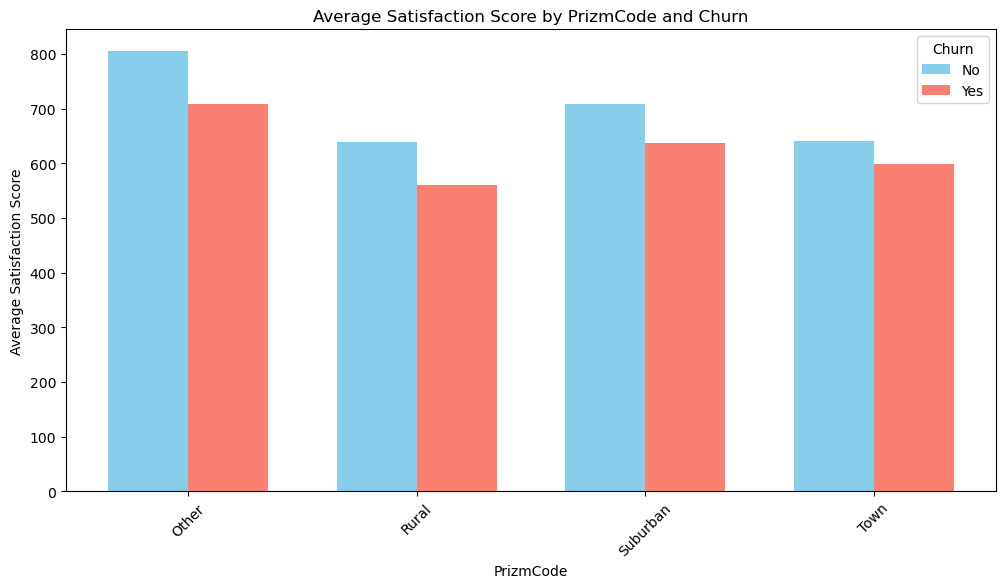

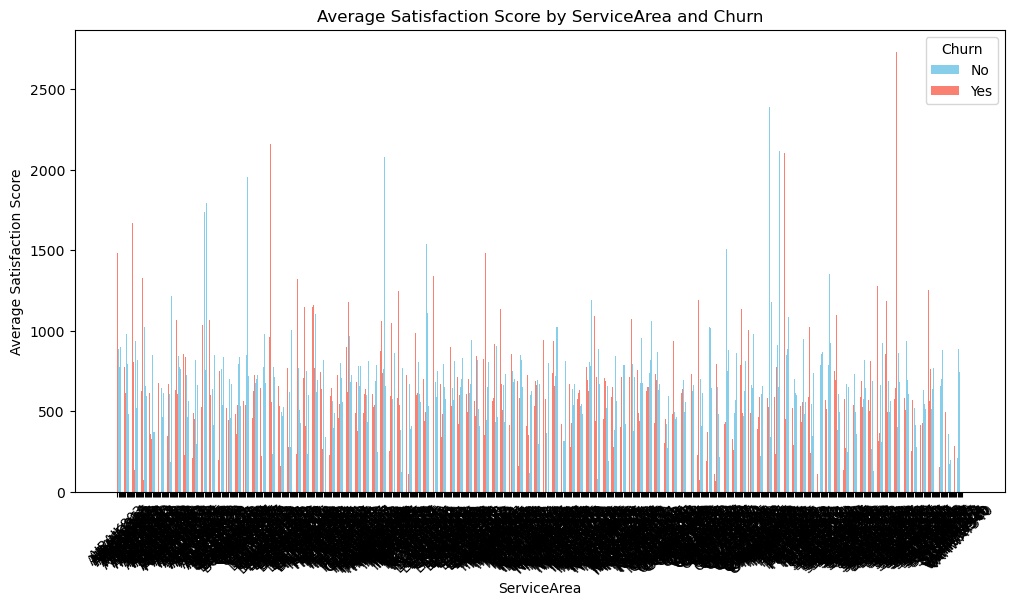

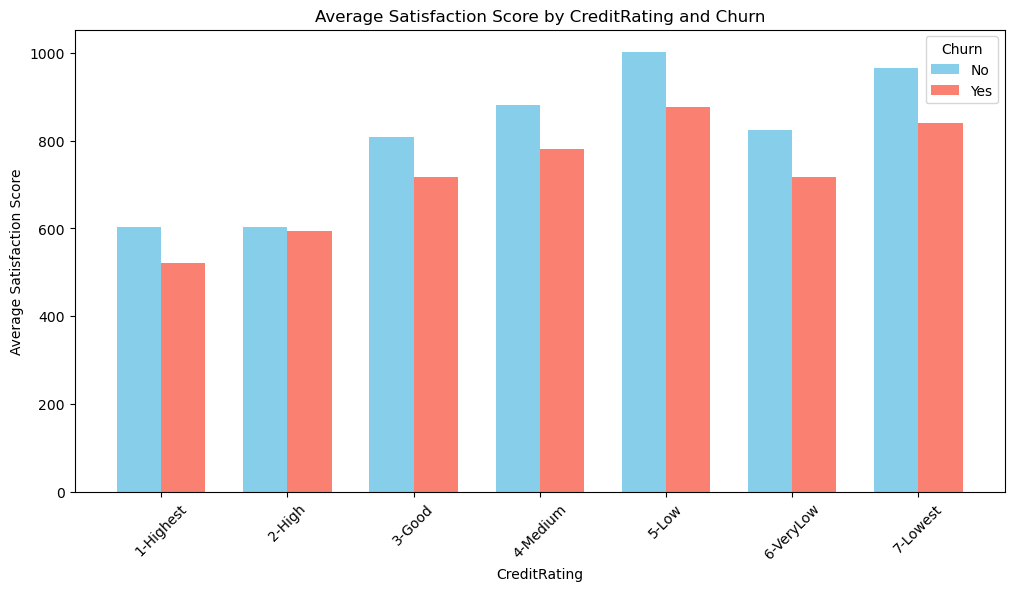

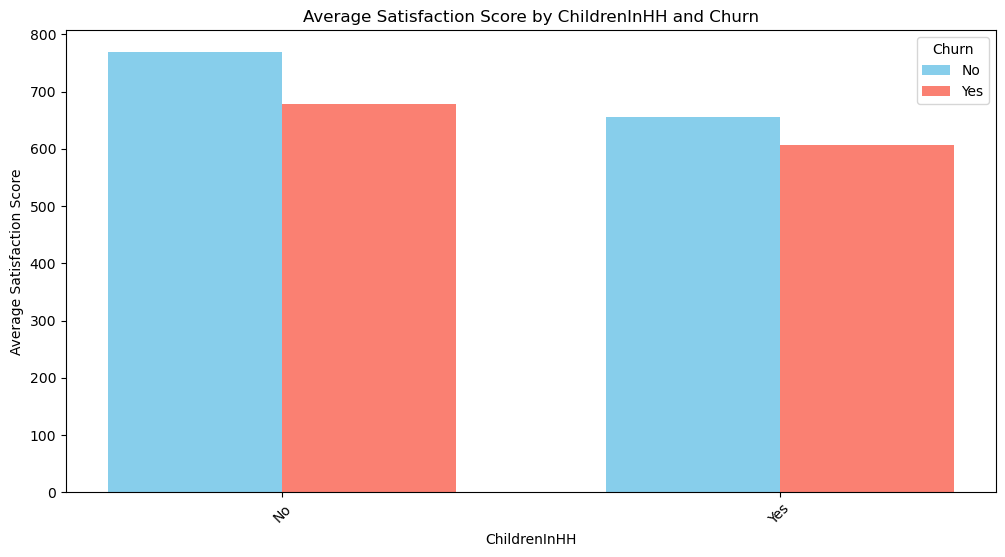

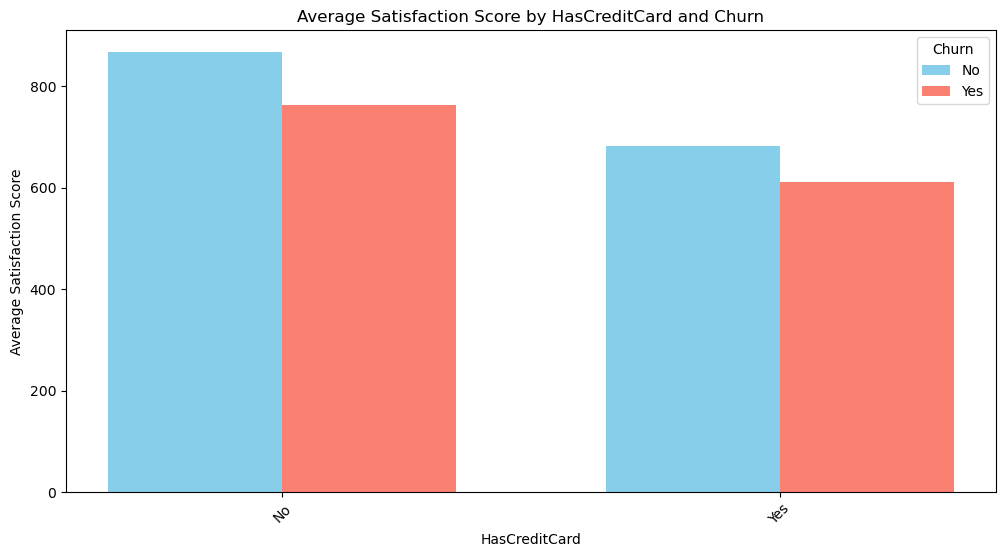

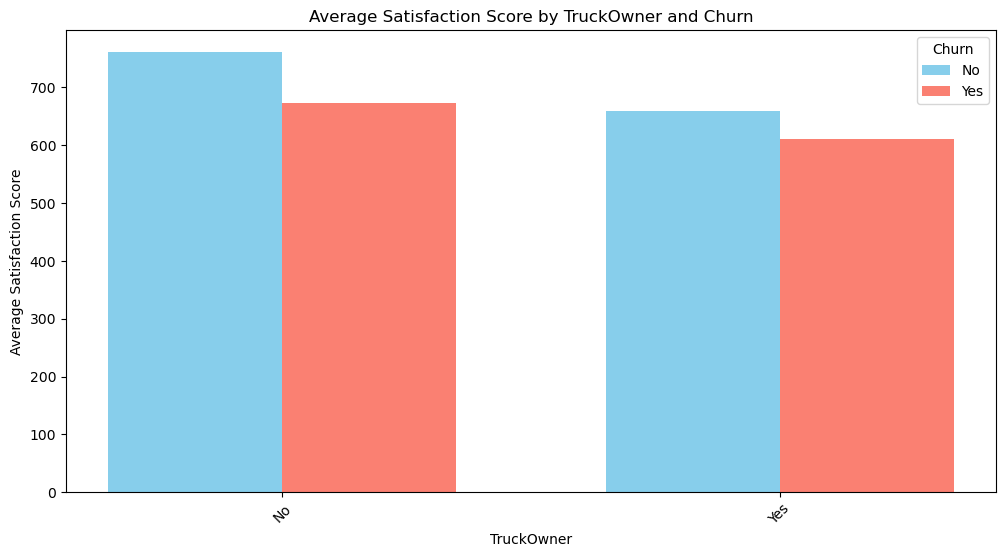

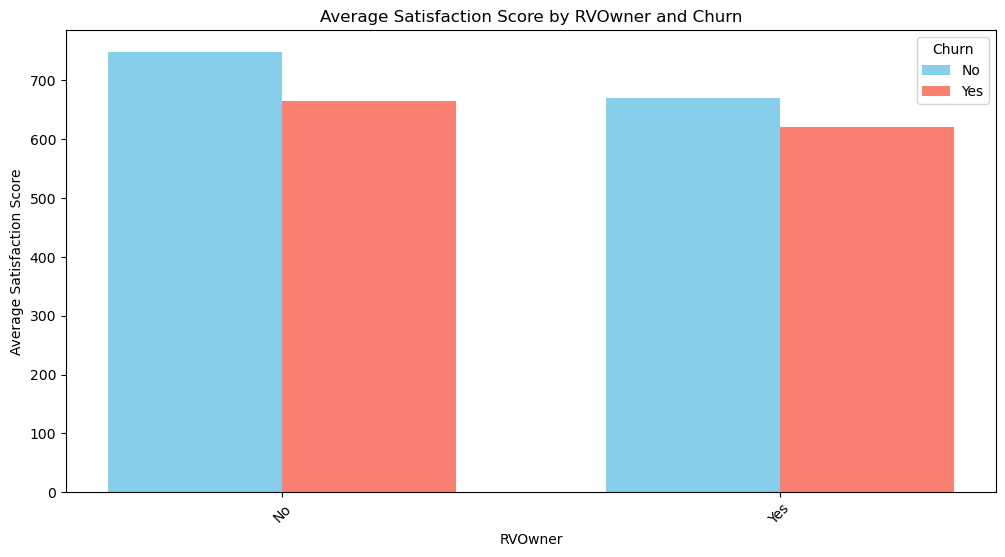

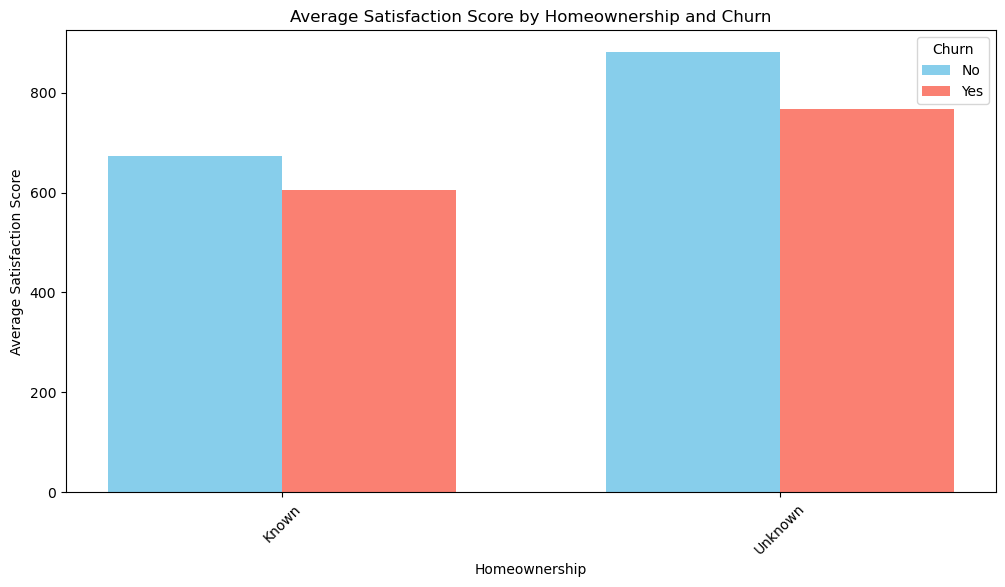

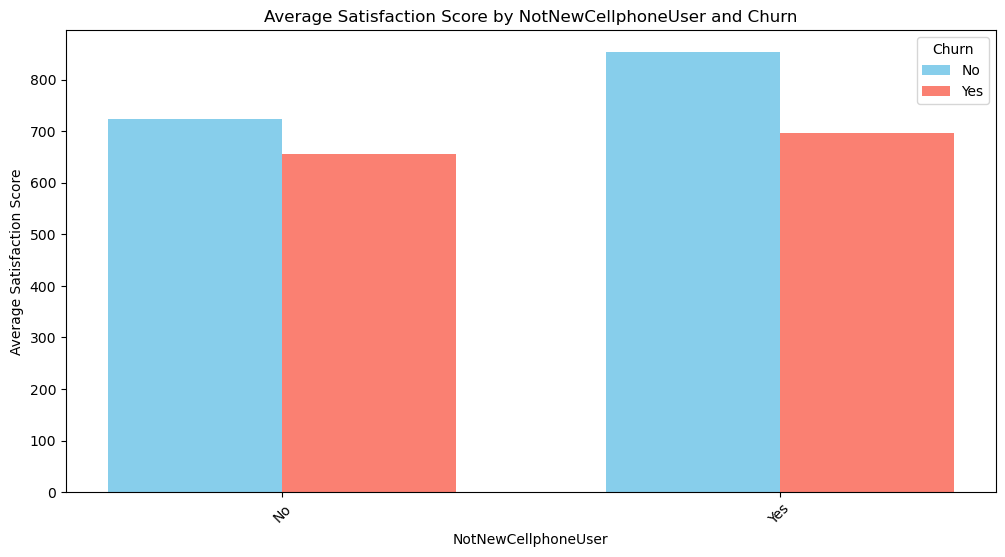

In [15]:
for mod in moderator_vars:
    # Ensure string type
    train_df[mod] = train_df[mod].astype(str)
    
    # Aggregate average satisfaction by moderator and churn
    pivot_df = train_df.groupby([mod, 'Churn'])['SatisfactionScore'].mean().unstack(fill_value=0)
    
    # Ensure both churn columns exist
    if 0 not in pivot_df.columns:
        pivot_df[0] = 0
    if 1 not in pivot_df.columns:
        pivot_df[1] = 0
    pivot_df = pivot_df[[0,1]]  # consistent order: No, Yes
    
    # Plot grouped bar chart
    labels = pivot_df.index
    churn_no = pivot_df[0]
    churn_yes = pivot_df[1]
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(x - width/2, churn_no, width, label='No', color='skyblue')
    ax.bar(x + width/2, churn_yes, width, label='Yes', color='salmon')
    
    ax.set_xlabel(mod)
    ax.set_ylabel('Average Satisfaction Score')
    ax.set_title(f'Average Satisfaction Score by {mod} and Churn')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend(title='Churn')
    
    plt.show()


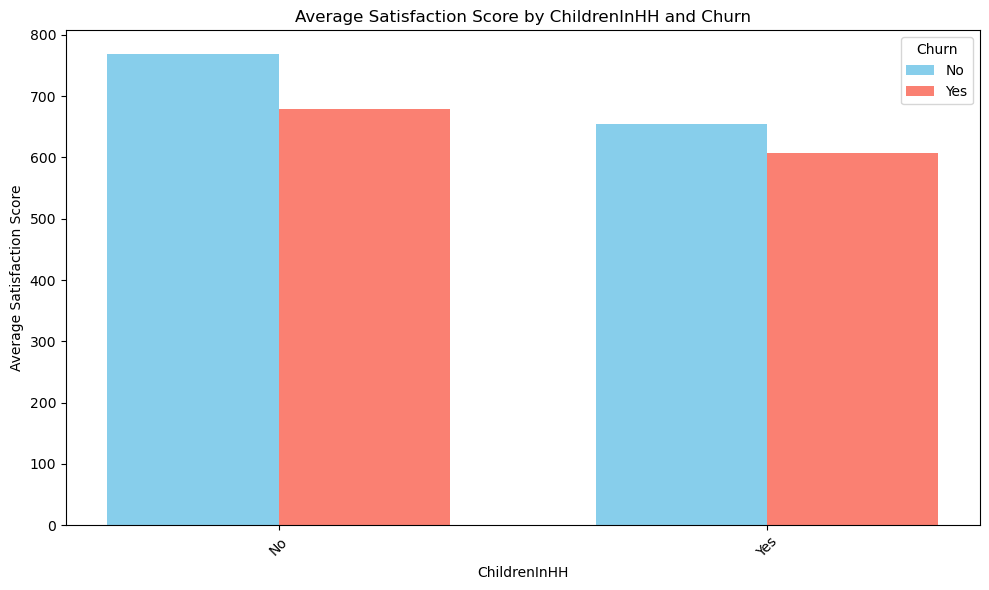

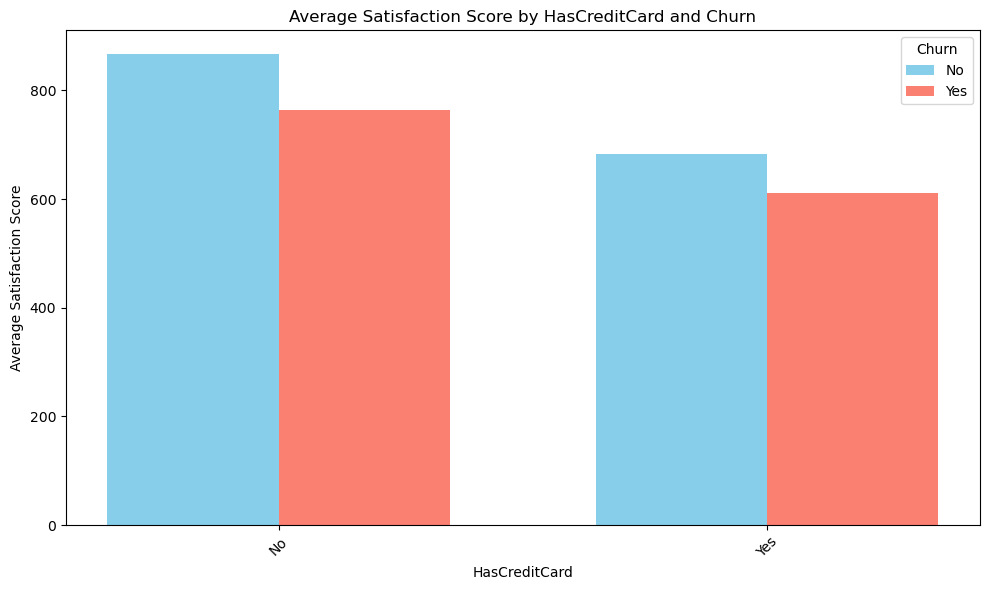

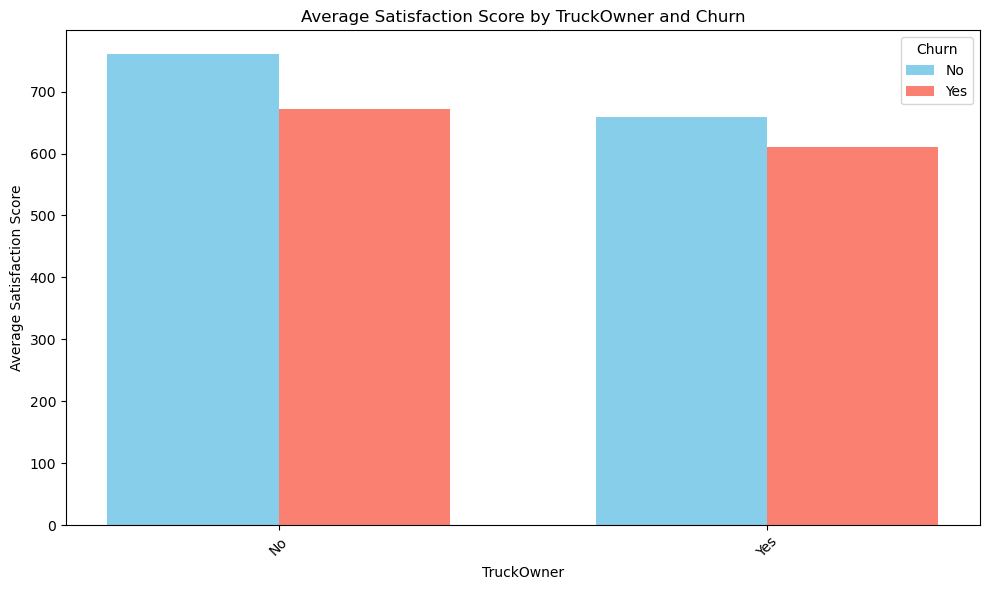

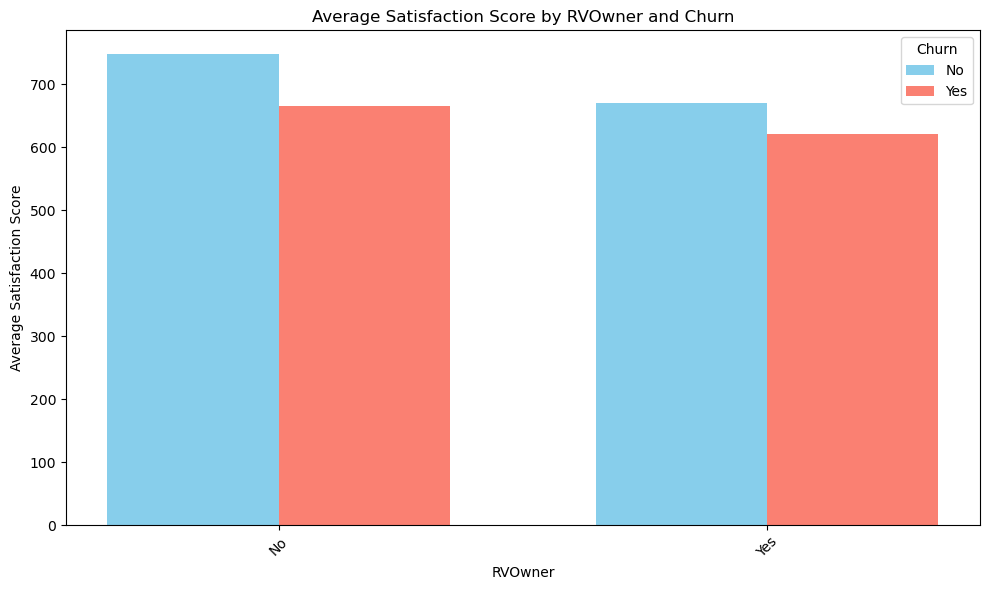

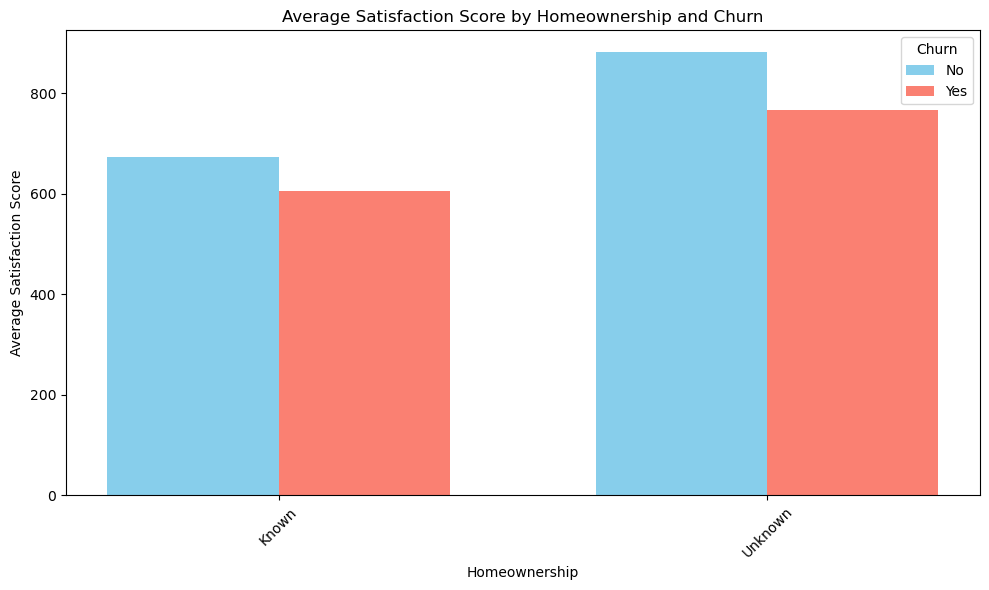

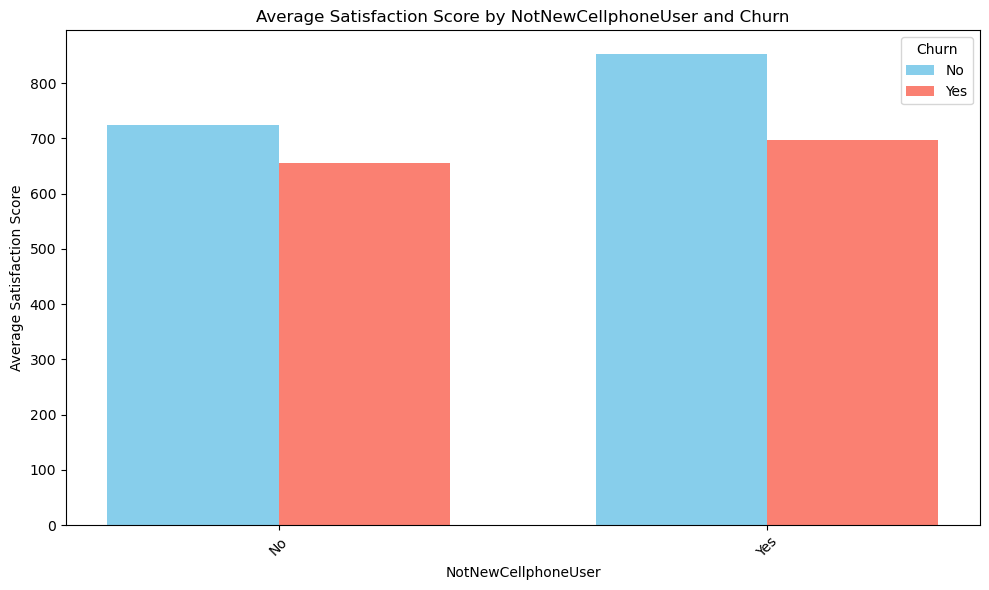

In [16]:
# List of binary moderators
binary_moderators = ['ChildrenInHH', 'HasCreditCard', 'TruckOwner', 
                     'RVOwner', 'Homeownership', 'NotNewCellphoneUser']

for mod in binary_moderators:
    # Ensure string type
    train_df[mod] = train_df[mod].astype(str)
    
    # Aggregate average satisfaction by moderator and churn
    pivot_df = train_df.groupby([mod, 'Churn'])['SatisfactionScore'].mean().unstack(fill_value=0)
    
    # Ensure both churn columns exist
    if 0 not in pivot_df.columns:
        pivot_df[0] = 0
    if 1 not in pivot_df.columns:
        pivot_df[1] = 0
    pivot_df = pivot_df[[0,1]]  # consistent order: No, Yes
    
    # Plot grouped bar chart
    labels = pivot_df.index
    churn_no = pivot_df[0]
    churn_yes = pivot_df[1]
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(x - width/2, churn_no, width, label='No', color='skyblue')
    ax.bar(x + width/2, churn_yes, width, label='Yes', color='salmon')
    
    ax.set_xlabel(mod)
    ax.set_ylabel('Average Satisfaction Score')
    ax.set_title(f'Average Satisfaction Score by {mod} and Churn')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend(title='Churn')
    
    plt.tight_layout()
    plt.show()



In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your variables are defined:
# moderator_vars = [...] 
# benefit_vars = [...] 
# cost_vars = [...] 

# Step 1: Run ANOVA and store all results
results = []

for mod in moderator_vars:
    for group, variables in {'Benefit': benefit_vars, 'Cost': cost_vars}.items():
        for var in variables:
            try:
                model = ols(f'{var} ~ C({mod})', data=train_df).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                f_value = anova_table.loc[f"C({mod})", "F"]
                p_value = anova_table.loc[f"C({mod})", "PR(>F)"]
                
                results.append({
                    "Moderator": mod,
                    "Variable": var,
                    "Exchange_Type": group,
                    "F-value": f_value,
                    "p-value": p_value,
                    "Significant": "Yes" if p_value < 0.05 else "No"
                })
            except Exception as e:
                print(f"Skipped {var} with {mod}: {e}")

# Step 2: Convert results to DataFrame
anova_results = pd.DataFrame(results)

# Step 3: Filter only significant moderators
significant_moderators = anova_results[anova_results['Significant'] == "Yes"]

# Step 4: Optional sorting
significant_moderators = significant_moderators.sort_values(by=['Moderator', 'Variable'])

# Step 5: Display table
display(significant_moderators)

# Optional: Export to Excel for your report
significant_moderators.to_excel("significant_moderators_table.xlsx", index=False)


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 0
  warnings.warn('covariance of constraints does not ha

,Moderator,Variable,Exchange_Type,F-value,p-value,Significant
4,AgeHH1,ActiveSubs,Benefit,17.077994,8.804532e-123,Yes
24,AgeHH1,AdjustmentsToCreditRating,Cost,2.631528,4.590355e-08,Yes
19,AgeHH1,BlockedCalls,Cost,3.901675,2.827477e-16,Yes
23,AgeHH1,CallWaitingCalls,Cost,6.882773,1.726643e-38,Yes
21,AgeHH1,CustomerCareCalls,Cost,13.920588,4.270493e-96,Yes
...,...,...,...,...,...,...
259,TruckOwner,OutboundCalls,Benefit,128.240612,1.078882e-29,Yes
266,TruckOwner,OverageMinutes,Cost,31.619499,1.885149e-08,Yes
258,TruckOwner,ReceivedCalls,Benefit,82.419864,1.138522e-19,Yes
252,TruckOwner,TotalRecurringCharge,Benefit,68.760993,1.138272e-16,Yes


In [23]:
# Group by moderator and get the row with minimum p-value
summary_rows = significant_moderators.loc[significant_moderators.groupby('Moderator')['p-value'].idxmin()]

# Select only relevant columns
moderator_summary = summary_rows[['Moderator', 'F-value', 'p-value']].copy()

# Add Significant column
moderator_summary['Significant'] = moderator_summary['p-value'].apply(lambda x: "Yes" if x < 0.05 else "No")

# Rename columns for clarity
moderator_summary.columns = ['Significant Moderator', 'F-value', 'Minimum p-value', 'Significant']

# Display the summary table
display(moderator_summary)

# Optional: export to Excel for report
moderator_summary.to_excel("moderator_summary_with_fvalues.xlsx", index=False)



,Significant Moderator,F-value,Minimum p-value,Significant
1,AgeHH1,37.028726,3.315712e-294,Yes
26,AgeHH2,27.686159,1.145346e-213,Yes
204,ChildrenInHH,468.900657,1.628532e-103,Yes
179,CreditRating,505.554700,0.000000e+00,Yes
228,HasCreditCard,950.538330,8.091108e-207,Yes
301,Homeownership,979.059720,6.656836e-213,Yes
101,IncomeGroup,125.398453,1.365151e-234,Yes
51,MaritalStatus,601.699486,5.223974e-259,Yes
328,NotNewCellphoneUser,1922.835866,0.000000e+00,Yes
76,Occupation,102.113692,5.131230e-149,Yes


***MODELLING***

In [21]:
# Defining Satisfaction Score Variables

benefit_vars = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
                'MonthsInService', 'ActiveSubs', 'Handsets', 'HandsetModels', 
                'HandsetWebCapable', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 
                'BuysViaMailOrder', 'RespondsToMailOffers', 'RetentionOffersAccepted', 
                'ReferralsMadeBySubscriber']

cost_vars = ['DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 
             'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 
             'CustomerCareCalls', 'CallForwardingCalls', 'CallWaitingCalls', 
             'AdjustmentsToCreditRating']

moderator_vars = ['AgeHH1', 'AgeHH2', 'MaritalStatus', 'Occupation', 
                  'IncomeGroup', 'PrizmCode', 'ServiceArea', 'CreditRating', 
                  'ChildrenInHH', 'HasCreditCard', 'TruckOwner', 'RVOwner', 
                  'Homeownership', 'NotNewCellphoneUser']



In [22]:
# Converting all SET columns to numeric (invalid entries will become 0)
for col in benefit_vars + cost_vars + moderator_vars:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce').fillna(0)

# Sum Benefits, Costs, and Moderators
train_df['Benefits'] = train_df[benefit_vars].sum(axis=1)
train_df['Costs'] = train_df[cost_vars].sum(axis=1)
train_df['Moderators'] = train_df[moderator_vars].sum(axis=1)

# Compute SatisfactionScore using SET formula
train_df['SatisfactionScore'] = (train_df['Benefits'] - train_df['Costs']) * train_df['Moderators']

# Inspection o
train_df[['Benefits','Costs','Moderators','SatisfactionScore']].head()


,Benefits,Costs,Moderators,SatisfactionScore
0,428.20,8.25,66.0,27716.70
1,105.99,3.00,87.0,8960.13
2,147.70,0.00,58.0,8566.60
3,2260.88,163.94,36.0,75489.84
4,96.14,1.00,109.0,10370.26


In [23]:
# Original churn proportion
original_churn_rate = train_df['Churn'].mean()  # Churn should already exist in your dataset

# Determining SatisfactionScore threshold corresponding to original churn rate
threshold = train_df['SatisfactionScore'].quantile(original_churn_rate)

# Creating Churn_SET based on threshold
train_df['Churn_SET'] = (train_df['SatisfactionScore'] <= threshold).astype(int)

# Inspecting Churn_SET distribution
print(train_df['Churn_SET'].value_counts())


Churn_SET
0    36336
1    14711
Name: count, dtype: int64


In [24]:
# Combining all feature variables
feature_vars = benefit_vars + cost_vars + moderator_vars
target_var = 'Churn_SET'

X = train_df[feature_vars]
y = train_df[target_var]


In [25]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le  # Save for inverse_transform if needed


In [26]:
# 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train distribution:", y_train.value_counts())
print("Validation distribution:", y_val.value_counts())
print("Test distribution:", y_test.value_counts())


Train distribution: Churn_SET
0    25435
1    10297
Name: count, dtype: int64
Validation distribution: Churn_SET
0    5450
1    2207
Name: count, dtype: int64
Test distribution: Churn_SET
0    5451
1    2207
Name: count, dtype: int64


In [27]:
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Train distribution AFTER SMOTE:", y_train_resampled.value_counts())


Train distribution AFTER SMOTE: Churn_SET
1    25435
0    25435
Name: count, dtype: int64


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [29]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}


In [30]:
fitted_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)  # Train on SMOTE-resampled training data
    fitted_models[name] = model
    
    # Validation set performance
    y_val_pred = model.predict(X_val_scaled)
    print(f"\n{name} - Validation Set Performance")
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))



LogisticRegression - Validation Set Performance
[[5175  275]
 [ 174 2033]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5450
           1       0.88      0.92      0.90      2207

    accuracy                           0.94      7657
   macro avg       0.92      0.94      0.93      7657
weighted avg       0.94      0.94      0.94      7657


RandomForest - Validation Set Performance
[[5417   33]
 [  50 2157]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5450
           1       0.98      0.98      0.98      2207

    accuracy                           0.99      7657
   macro avg       0.99      0.99      0.99      7657
weighted avg       0.99      0.99      0.99      7657


GradientBoosting - Validation Set Performance
[[5398   52]
 [  26 2181]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5450
           1     

In [31]:
results = []

for name, model in fitted_models.items():
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]),
        'MCC': matthews_corrcoef(y_test, y_pred),
        'Cohen Kappa': cohen_kappa_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,Cohen Kappa
0,LogisticRegression,0.937582,0.868657,0.922972,0.894991,0.978891,0.851434,0.850642
1,RandomForest,0.987595,0.977828,0.979157,0.978492,0.999401,0.969776,0.969776
2,GradientBoosting,0.988509,0.971518,0.989126,0.980242,0.999433,0.972220,0.972142
3,MLPClassifier,0.993993,0.993604,0.985501,0.989536,0.999753,0.985340,0.985324


***MODEL INTEPRETABILITY***

In [94]:
X_background = X_train_scaled[:100]   # small sample for SHAP
X_test_subset = X_test_scaled[:50]
X_test_subset_df = pd.DataFrame(X_test_subset, columns=feature_vars)


In [95]:
mlp_model = fitted_models['MLPClassifier']
mlp_predict_proba = lambda X: mlp_model.predict_proba(X)


In [96]:
explainer = shap.Explainer(mlp_predict_proba, X_background)


In [97]:
shap_values_full = explainer(X_test_subset_df)


In [98]:
# If binary classification, pick class 1 (churn)
shap_values = shap_values_full.values[:, :, 1]  # shape: (n_samples, n_features)


C:\Users\hp\AppData\Local\Temp\ipykernel_7192\3546931215.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_subset_df)


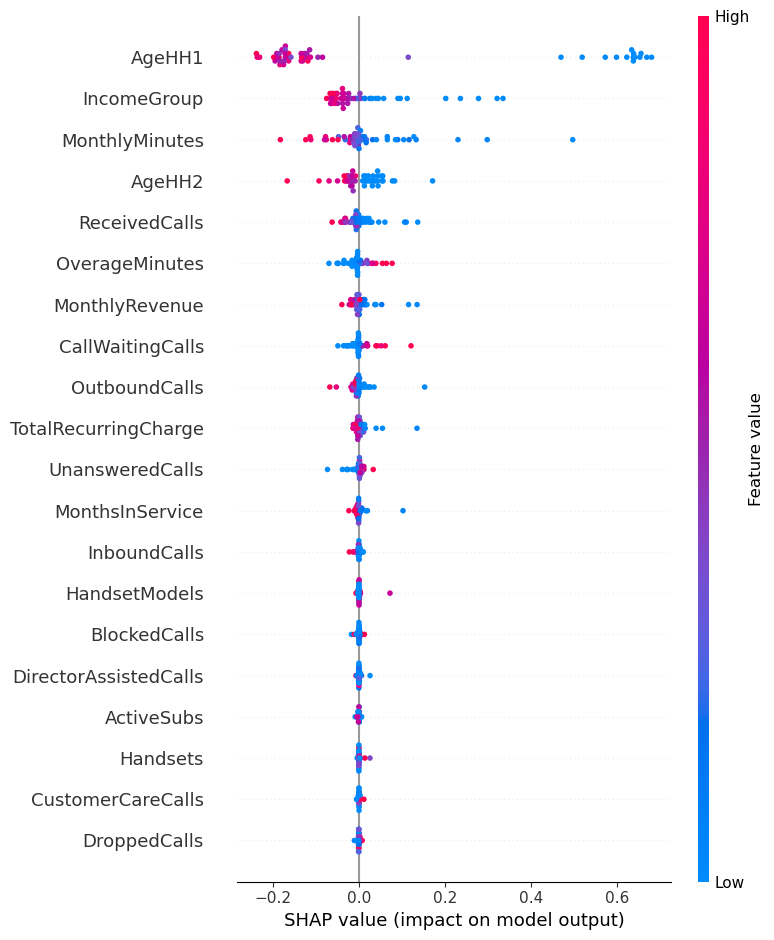

In [99]:
shap.summary_plot(shap_values, X_test_subset_df)
